In [1]:
from preprocessing import *
from encoder import Encoder
from decoder import Decoder
import torch.optim as optim

# device = torch.device('cuda:3')
device = torch.device('cpu')
encoder = Encoder().to(device) # input 64*64 image, output 128 feacture vector
decoder = Decoder().to(device) # input 128 feature vector, output 64*64 image

train_data = train_data.to(device)

In [2]:
def train_VAE_1ep(encoder, decoder, optimizer_e, optimizer_d, epoch):  
#     gan_input = torch.normal(0, 1, size=(1,1,64, 64)) # noise
    encoder.train()
    decoder.train()
    ep_loss = 0
    for i in range(train_data.shape[0]):
        optimizer_e.zero_grad()
        optimizer_d.zero_grad()
        z = torch.sum((train_data[i] - decoder(encoder(train_data[i])))**2)
        loss=z
        loss.backward()
        optimizer_e.step()
        optimizer_d.step()
        ep_loss += loss.item()
    if epoch%20 == 0:
        tensor_to_picture(decoder(encoder(train_data[200])).detach().cpu().numpy()[0][0])
    
    return ep_loss/train_data.shape[0]

In [3]:
def train_VAE(eps, lr, reg, lr_decay):
    for epoch in range(eps): 
        optimizer_e = optim.SGD(encoder.parameters(), lr=lr*lr_decay**epoch, momentum=0.9, weight_decay=reg, nesterov=False)
        optimizer_d = optim.SGD(decoder.parameters(), lr=lr*lr_decay**epoch, momentum=0.9, weight_decay=reg, nesterov=False)
        epoch_loss = train_VAE_1ep(encoder, decoder, optimizer_e, optimizer_d, epoch)
        print("loss(generator): ", epoch_loss)

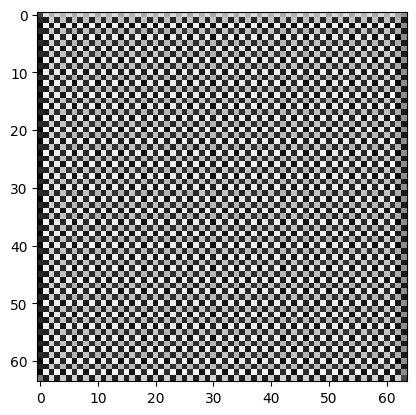

loss(generator):  4371.581332702637
loss(generator):  4373.437401123047
loss(generator):  4374.5942578125
loss(generator):  4333.637960510254
loss(generator):  4200.75064819336
loss(generator):  4010.748394470215
loss(generator):  4004.9923684692385
loss(generator):  4000.5645336914063
loss(generator):  3713.4262963867186
loss(generator):  2712.1714321899412
loss(generator):  2433.068159790039
loss(generator):  2126.0318002319336
loss(generator):  1958.56763961792
loss(generator):  1857.0913719177247
loss(generator):  1793.7173141479493
loss(generator):  1771.9097737121583
loss(generator):  1780.0935081481935
loss(generator):  1707.0614364624023
loss(generator):  1681.2862007141114
loss(generator):  1678.0688525390624


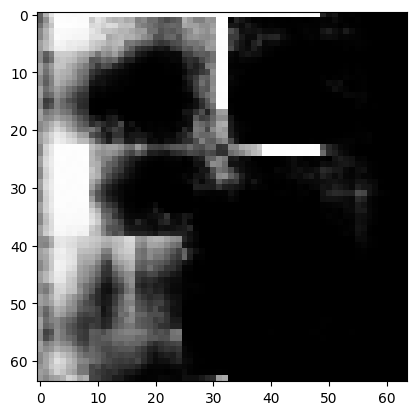

loss(generator):  1703.0208309936525
loss(generator):  1647.7877798461914
loss(generator):  1604.8772380065918
loss(generator):  1592.5984841918946
loss(generator):  1581.580973815918
loss(generator):  1578.914459991455
loss(generator):  1549.6202862548828
loss(generator):  1521.9817250061035
loss(generator):  1511.6015702819825
loss(generator):  1504.2417874145508


In [16]:
train_VAE(30, 0.00001, 0.00001, 1)

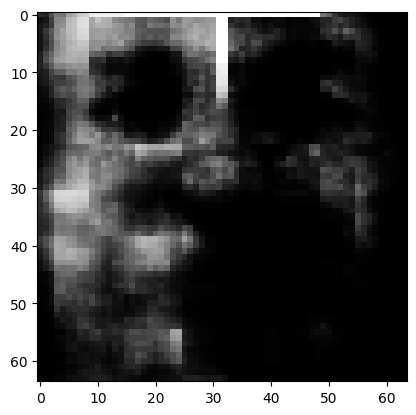

loss(generator):  1477.2056791687012
loss(generator):  1481.6610813903808
loss(generator):  1476.0794506835937
loss(generator):  1445.1920056152344
loss(generator):  1445.6318783569336
loss(generator):  1428.2985914611816
loss(generator):  1427.2142196655273
loss(generator):  1439.0371325683593
loss(generator):  1456.4262936401367
loss(generator):  1445.7583271789551
loss(generator):  1459.5373175048828
loss(generator):  1433.7668742370606
loss(generator):  1467.058748626709
loss(generator):  1430.3706000518798
loss(generator):  1402.5532455444336
loss(generator):  1382.5748979187013
loss(generator):  1408.6387255859374
loss(generator):  1470.9304829406738
loss(generator):  1465.549365081787
loss(generator):  1423.7217529296875


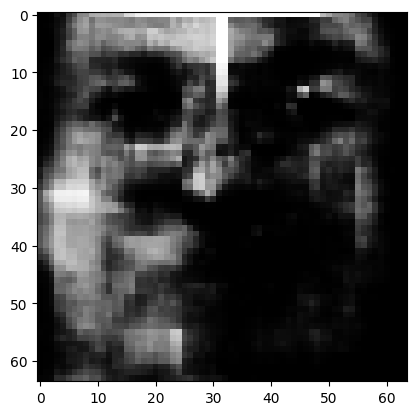

loss(generator):  1393.0520497131347
loss(generator):  1389.617241821289
loss(generator):  1397.3297361755372
loss(generator):  1361.935983276367
loss(generator):  1362.475196838379
loss(generator):  1355.2889256286621
loss(generator):  1351.017639389038
loss(generator):  1384.244785308838
loss(generator):  1423.1973638916015
loss(generator):  1428.036697998047
loss(generator):  1399.9061572265625
loss(generator):  1379.3792226409912
loss(generator):  1356.8165310668946
loss(generator):  1349.2799463653564
loss(generator):  1336.0061293029785
loss(generator):  1339.7029248046874
loss(generator):  1406.7513040924073
loss(generator):  1419.7473166656494
loss(generator):  1379.3874277496338
loss(generator):  1342.284524383545


In [17]:
train_VAE(40, 0.00001, 0.00001, 1)

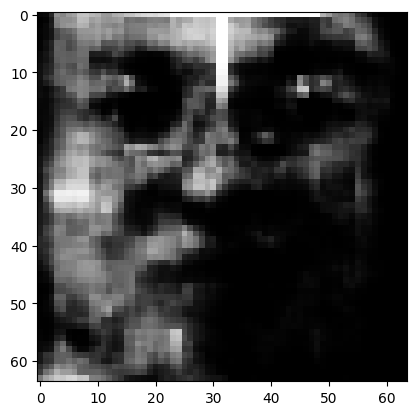

loss(generator):  1310.309323501587
loss(generator):  1279.726519317627
loss(generator):  1285.233833770752
loss(generator):  1276.7891623687744
loss(generator):  1268.1468368530273
loss(generator):  1275.0651536560058
loss(generator):  1268.3814588928224
loss(generator):  1273.685152206421
loss(generator):  1283.731430206299
loss(generator):  1277.986510925293
loss(generator):  1287.5274285888672
loss(generator):  1296.927765045166
loss(generator):  1267.629288482666
loss(generator):  1259.0547668457032
loss(generator):  1262.1611720275878
loss(generator):  1262.0801329040528
loss(generator):  1282.4175833892823
loss(generator):  1294.022031326294
loss(generator):  1288.2061415863036
loss(generator):  1270.5516450500488


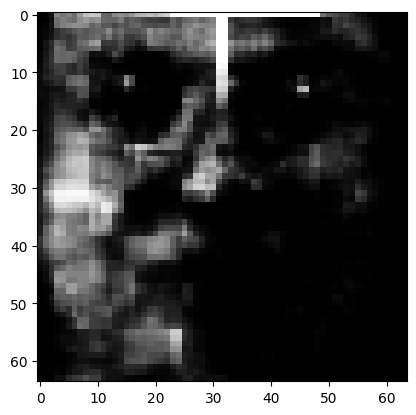

loss(generator):  1252.6076547241212
loss(generator):  1235.60853515625
loss(generator):  1225.2697941589356
loss(generator):  1228.6301121520996
loss(generator):  1227.53724319458
loss(generator):  1232.592128753662
loss(generator):  1237.494228591919
loss(generator):  1239.1611445617675
loss(generator):  1253.6586164855958
loss(generator):  1252.4884462738037
loss(generator):  1246.1843243408202
loss(generator):  1235.1360605621337
loss(generator):  1237.9896408843995
loss(generator):  1235.6784745788575
loss(generator):  1229.5104496765136
loss(generator):  1223.9835634613037
loss(generator):  1216.882879486084
loss(generator):  1213.0520351409912
loss(generator):  1205.9376654052735
loss(generator):  1202.5576838684083


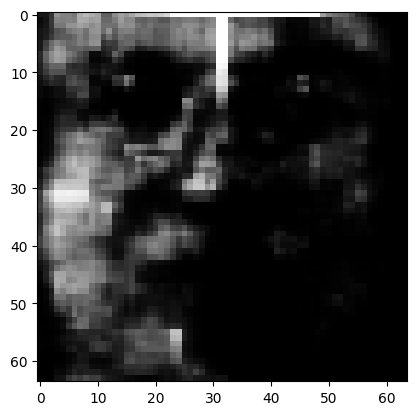

loss(generator):  1198.5018045043946
loss(generator):  1189.5314678955078
loss(generator):  1182.9082051086425
loss(generator):  1172.0284154510498
loss(generator):  1164.0233213806152
loss(generator):  1153.5396732330323
loss(generator):  1146.7407639312744
loss(generator):  1138.908154067993
loss(generator):  1133.1770963287354
loss(generator):  1127.8294847869872
loss(generator):  1123.9713709259033
loss(generator):  1119.5698709106446
loss(generator):  1117.2044595336913
loss(generator):  1114.7742105102539
loss(generator):  1111.9663864898682
loss(generator):  1109.9668326568603
loss(generator):  1108.554758682251
loss(generator):  1106.251848526001
loss(generator):  1105.4928189849854
loss(generator):  1104.1040367889404


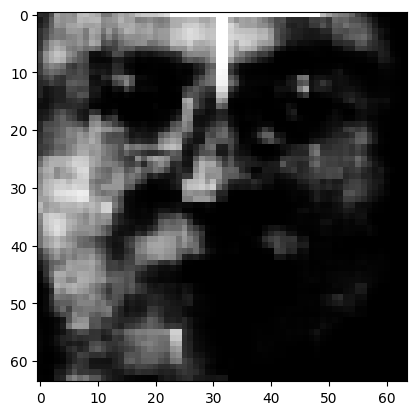

loss(generator):  1104.287000274658
loss(generator):  1101.7035536956787
loss(generator):  1100.4472472381592
loss(generator):  1096.923134841919
loss(generator):  1095.3139649200439
loss(generator):  1092.6435730743408
loss(generator):  1090.0434320831298
loss(generator):  1089.5724326324462
loss(generator):  1087.8931742858886
loss(generator):  1086.3928153991699
loss(generator):  1085.3148369598389
loss(generator):  1083.2468758392333
loss(generator):  1082.5167488098145
loss(generator):  1081.1697840881347
loss(generator):  1080.5504614257814
loss(generator):  1079.7994451904297
loss(generator):  1079.2881129455566
loss(generator):  1078.9101609802246
loss(generator):  1078.821212463379
loss(generator):  1077.6180546569824


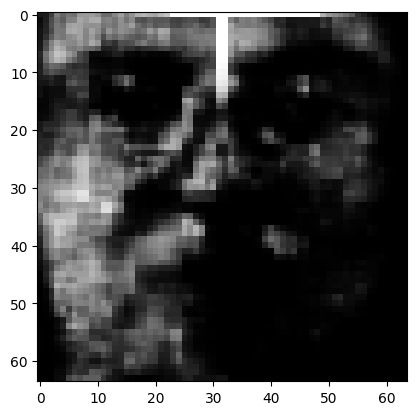

loss(generator):  1077.0790458679198
loss(generator):  1076.8349206542969
loss(generator):  1075.6474088287353
loss(generator):  1076.5566285705565
loss(generator):  1074.9365958404542
loss(generator):  1073.9369301605225
loss(generator):  1071.2546823883056
loss(generator):  1069.935177307129
loss(generator):  1068.0187853240966
loss(generator):  1066.920069885254
loss(generator):  1066.1958548736573
loss(generator):  1064.530736618042
loss(generator):  1063.8120587158203
loss(generator):  1062.820824584961
loss(generator):  1061.5658219146728
loss(generator):  1060.979654006958
loss(generator):  1059.8753847503663
loss(generator):  1058.8027998352052
loss(generator):  1057.558701171875
loss(generator):  1055.8287990570068


In [18]:
train_VAE(100, 0.00001, 0.00001, 0.99)

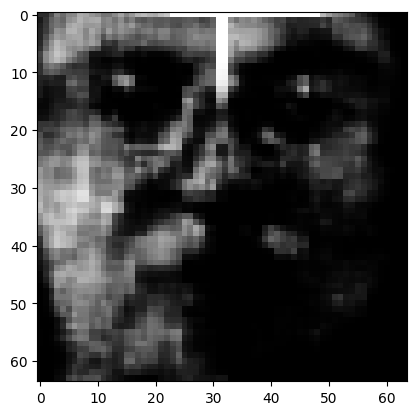

loss(generator):  1054.4454541778564
loss(generator):  1053.516275024414
loss(generator):  1052.1310235595704
loss(generator):  1050.9132365417481
loss(generator):  1049.978404083252
loss(generator):  1048.4111380767822
loss(generator):  1048.0167803955078
loss(generator):  1046.5788596343994
loss(generator):  1045.6879049682618
loss(generator):  1043.92681060791
loss(generator):  1043.0822386169434
loss(generator):  1042.2992071533204
loss(generator):  1041.4376424407958
loss(generator):  1039.8788133239746
loss(generator):  1039.0920346069336
loss(generator):  1037.627287902832
loss(generator):  1037.1277252197265
loss(generator):  1036.9361993408204
loss(generator):  1036.161000289917
loss(generator):  1035.0405478668213


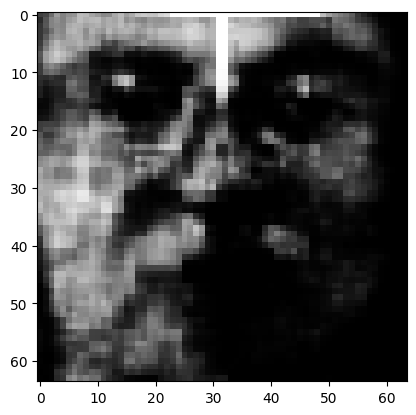

loss(generator):  1033.9495301055908
loss(generator):  1033.1208880615234
loss(generator):  1032.8268145751954
loss(generator):  1032.026563949585
loss(generator):  1030.91352394104
loss(generator):  1030.5131645202637
loss(generator):  1030.1034687805177
loss(generator):  1029.071356201172
loss(generator):  1028.5299289703369
loss(generator):  1027.9528383636475
loss(generator):  1027.0626264953614
loss(generator):  1026.2245893859863
loss(generator):  1025.6192009735107
loss(generator):  1025.4320379638673
loss(generator):  1024.4140473175048
loss(generator):  1023.7511280822754
loss(generator):  1023.3186430358887
loss(generator):  1022.4506855010986
loss(generator):  1022.1541494750977
loss(generator):  1021.6108386230469


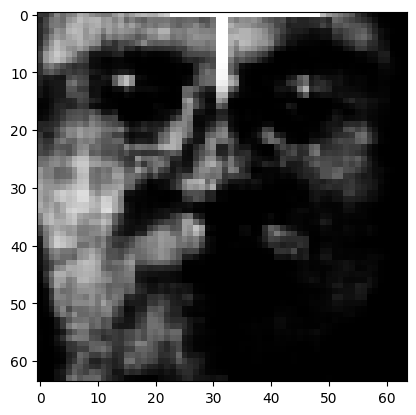

loss(generator):  1021.2632162475586
loss(generator):  1020.4819528198242
loss(generator):  1020.1463390350342
loss(generator):  1019.3555517578125
loss(generator):  1018.7269894409179
loss(generator):  1018.1738626861572
loss(generator):  1017.3621884918213
loss(generator):  1016.8377561950683
loss(generator):  1016.3583910369873
loss(generator):  1015.9433397674561
loss(generator):  1015.4026486968994
loss(generator):  1014.8816962432861
loss(generator):  1014.4134362030029
loss(generator):  1014.3664538574219
loss(generator):  1013.6094256591797
loss(generator):  1013.4658074188233
loss(generator):  1013.0753454589844
loss(generator):  1012.5874269104004
loss(generator):  1011.9371086120606
loss(generator):  1011.2928502655029


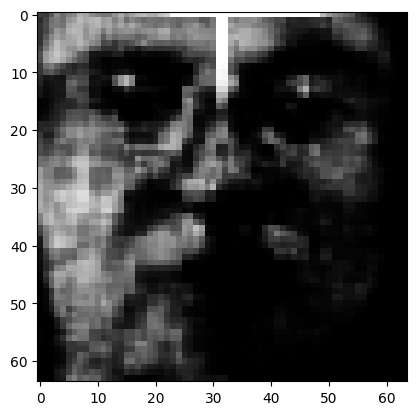

loss(generator):  1010.7575830078125
loss(generator):  1010.5669428253174
loss(generator):  1010.4233070373535
loss(generator):  1010.2904521942139
loss(generator):  1009.8010147094726
loss(generator):  1009.0525354766846
loss(generator):  1008.8986129760742
loss(generator):  1008.4985341644287
loss(generator):  1007.7486045074463
loss(generator):  1007.2889514923096
loss(generator):  1007.2511157989502
loss(generator):  1006.9711585998535
loss(generator):  1006.4637380981445
loss(generator):  1006.1601947784424
loss(generator):  1006.0381983184815
loss(generator):  1005.367161102295
loss(generator):  1005.0725875091553
loss(generator):  1004.7595146179199
loss(generator):  1004.3624966430664
loss(generator):  1003.8850087738037


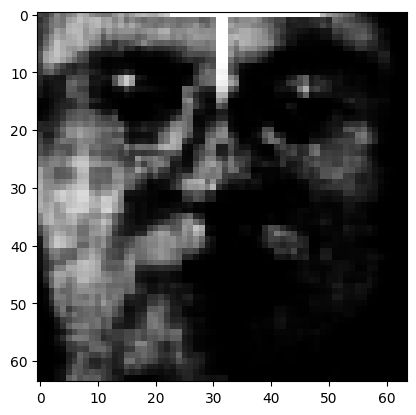

loss(generator):  1003.6872068023681
loss(generator):  1003.275697555542
loss(generator):  1003.2970057678223
loss(generator):  1002.7210788726807
loss(generator):  1002.4078818511963
loss(generator):  1001.987364654541
loss(generator):  1001.7147466278076
loss(generator):  1001.3683420562744
loss(generator):  1001.1810140991211
loss(generator):  1000.7610883331299
loss(generator):  1000.2858319854736
loss(generator):  1000.1018001556397
loss(generator):  999.8337950897217
loss(generator):  999.7245241546631
loss(generator):  999.3845510864257
loss(generator):  999.0223580932617
loss(generator):  998.6913105010987
loss(generator):  998.2964319610596
loss(generator):  998.1332025909423
loss(generator):  997.813212966919


In [19]:
train_VAE(100, 0.00000366, 0.00001, 0.995)

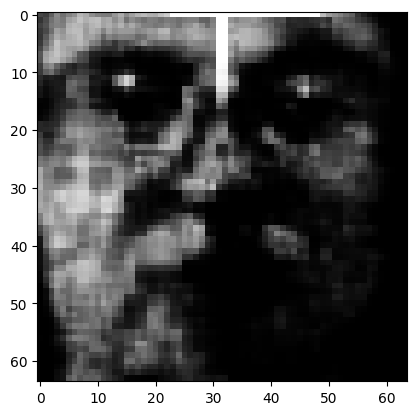

loss(generator):  997.5399491882324
loss(generator):  997.3155224609375
loss(generator):  997.2142655944824
loss(generator):  996.7688969421387
loss(generator):  996.332911529541
loss(generator):  995.9246992492676
loss(generator):  995.8534579467773
loss(generator):  995.6555832672119
loss(generator):  995.1463886260987
loss(generator):  994.9202893066406
loss(generator):  994.5049459075927
loss(generator):  994.5941397094726
loss(generator):  994.0983979034423
loss(generator):  993.8623901367188
loss(generator):  993.4272550964356
loss(generator):  993.1794091796875
loss(generator):  992.9491668701172
loss(generator):  992.6699759674073
loss(generator):  992.291132888794
loss(generator):  992.1035858154297


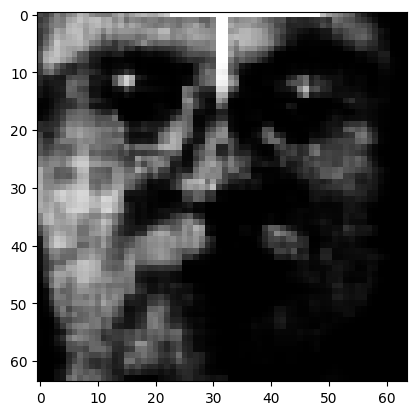

loss(generator):  991.8459793853759
loss(generator):  991.6822547912598
loss(generator):  991.2483846282959
loss(generator):  991.1194498443604
loss(generator):  991.0308365631104
loss(generator):  990.7217443847657
loss(generator):  990.3759557342529
loss(generator):  989.9459548950196
loss(generator):  989.8582962799072
loss(generator):  989.7302088928222
loss(generator):  989.4473505401611
loss(generator):  989.4679596710205
loss(generator):  988.9597595214843
loss(generator):  988.7531465148926
loss(generator):  988.585683517456
loss(generator):  988.3299428558349
loss(generator):  987.9428765106201
loss(generator):  987.8125798034667
loss(generator):  987.5968170166016
loss(generator):  987.2885272979736


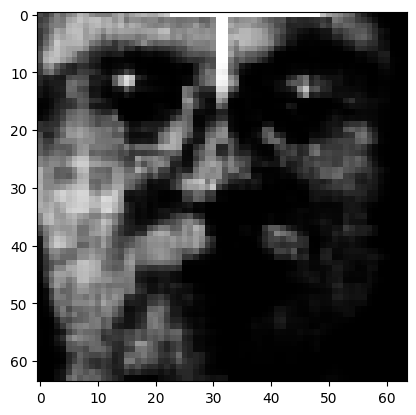

loss(generator):  987.1194790649414
loss(generator):  987.0126541137695
loss(generator):  986.6729003143311
loss(generator):  986.433794631958
loss(generator):  986.1886657714844
loss(generator):  985.7996499633789
loss(generator):  985.6133737182618
loss(generator):  985.3852746582031
loss(generator):  985.0972946929932
loss(generator):  985.0266722869873
loss(generator):  984.8241456604004
loss(generator):  984.5179936981201
loss(generator):  984.4042321014405
loss(generator):  984.3103350067139
loss(generator):  983.9670755004882
loss(generator):  983.6951119232177
loss(generator):  983.4161957550049
loss(generator):  983.143405456543
loss(generator):  983.0360349273682
loss(generator):  982.7148221588135


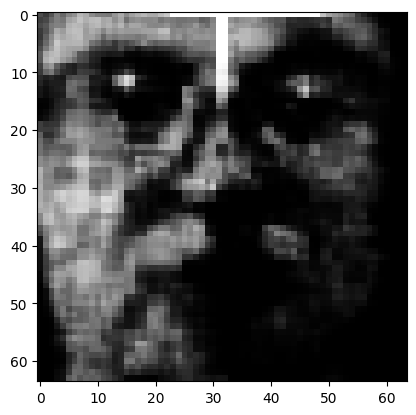

loss(generator):  982.5545975494384
loss(generator):  982.3507523345947
loss(generator):  982.3810019683838
loss(generator):  982.1965336608887
loss(generator):  981.9385332489014
loss(generator):  981.8369718170165
loss(generator):  981.6692769622803
loss(generator):  981.2662772369384
loss(generator):  981.1590487670899
loss(generator):  980.9971360778809
loss(generator):  980.7998039245606
loss(generator):  980.7587449645996
loss(generator):  980.5233895111083
loss(generator):  980.3489750671387
loss(generator):  980.1947888183594
loss(generator):  979.9577753448486
loss(generator):  979.7894046783447
loss(generator):  979.722289352417
loss(generator):  979.3824796295166
loss(generator):  979.219300994873


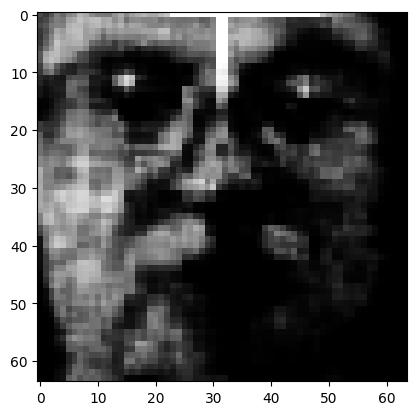

loss(generator):  978.9472313690186
loss(generator):  978.8137976074219
loss(generator):  978.679076461792
loss(generator):  978.5636196136475
loss(generator):  978.4306331634522
loss(generator):  978.0972617340088
loss(generator):  977.898166885376
loss(generator):  977.7088945770264
loss(generator):  977.523553237915
loss(generator):  977.4409485626221
loss(generator):  977.1858087921142
loss(generator):  977.0916958618164
loss(generator):  976.8841720581055
loss(generator):  976.7264461517334
loss(generator):  976.5878771209717
loss(generator):  976.4356156921386
loss(generator):  976.208673171997
loss(generator):  976.0806929016113
loss(generator):  975.9508403015137
loss(generator):  975.7768112182617


In [20]:
train_VAE(100, 0.00000221, 0.00001, 0.995)

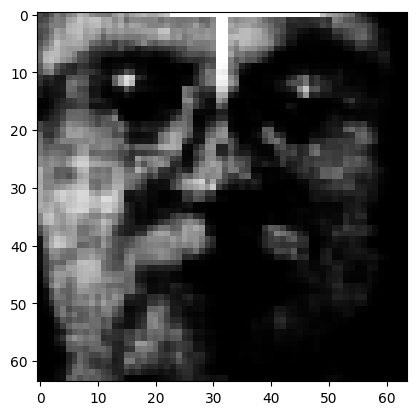

loss(generator):  977.2526651763916
loss(generator):  977.7969289398193
loss(generator):  978.1363842010499
loss(generator):  978.1152677154541
loss(generator):  978.1010706329346
loss(generator):  978.2209030914306
loss(generator):  977.5432450103759
loss(generator):  977.5256596374512
loss(generator):  977.2500138092041
loss(generator):  977.4189323425293
loss(generator):  976.996831665039
loss(generator):  976.6777362060546
loss(generator):  976.2939967346191
loss(generator):  976.0208795928955
loss(generator):  976.0604566955567
loss(generator):  976.0109281921386
loss(generator):  975.9624729919434
loss(generator):  976.0107981109619
loss(generator):  976.1126523590087
loss(generator):  975.8824151611328


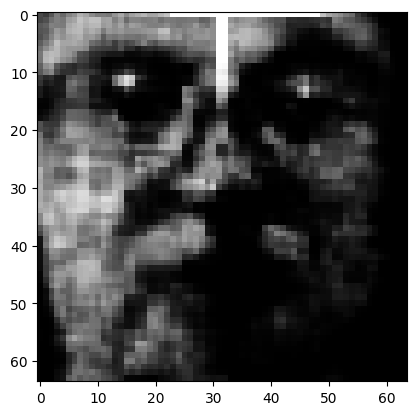

loss(generator):  975.0641088104248
loss(generator):  974.9972206878662
loss(generator):  974.6502145385742
loss(generator):  974.2521105194091
loss(generator):  974.1099181365967
loss(generator):  973.9958611297608
loss(generator):  973.9851734161377
loss(generator):  973.7065339660644
loss(generator):  973.5453314208985
loss(generator):  973.5768360900879
loss(generator):  973.3027053833008
loss(generator):  973.277886581421
loss(generator):  972.9910515594482
loss(generator):  972.6155894470215
loss(generator):  972.661583404541
loss(generator):  972.5396727752685
loss(generator):  972.3569338989258
loss(generator):  972.1495747375488
loss(generator):  972.2142612457276
loss(generator):  971.8970143890381


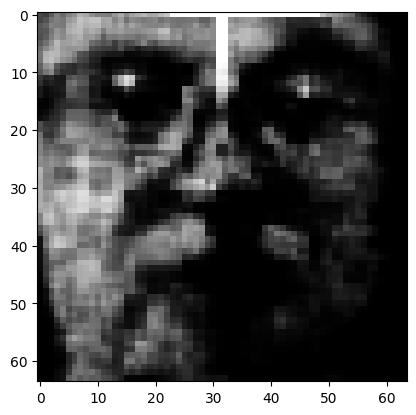

loss(generator):  971.860551071167
loss(generator):  971.8860723876953
loss(generator):  971.7873029327393
loss(generator):  971.5956178283691
loss(generator):  971.285774154663
loss(generator):  970.9376923370361
loss(generator):  970.7939014434814
loss(generator):  970.5262022399902
loss(generator):  970.3033261108399
loss(generator):  970.2038836669922
loss(generator):  970.3036437988281
loss(generator):  970.0395934295655
loss(generator):  969.8273454284667
loss(generator):  969.7401468658447
loss(generator):  969.563271408081
loss(generator):  969.4791186523438
loss(generator):  969.3511946868897
loss(generator):  969.2100610351563
loss(generator):  968.9056980133057
loss(generator):  968.8892956542969


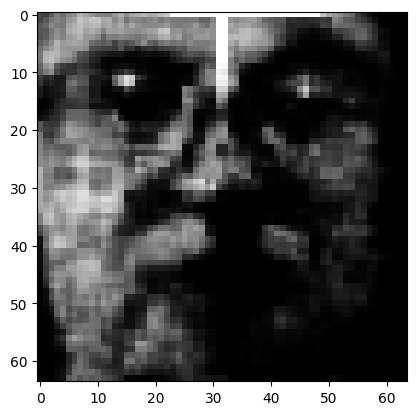

loss(generator):  968.832670288086
loss(generator):  968.5236124420167
loss(generator):  968.3164524841309
loss(generator):  968.1760119628906
loss(generator):  967.9593309020996
loss(generator):  967.9886410522461
loss(generator):  967.8395891571045
loss(generator):  967.7611081695557
loss(generator):  967.6193514251709
loss(generator):  967.3629630279542
loss(generator):  967.3872384643555
loss(generator):  967.1154063415528
loss(generator):  967.3107904815674
loss(generator):  967.0792631530762
loss(generator):  966.8379075622559
loss(generator):  966.6623890686035
loss(generator):  966.5577675628662
loss(generator):  966.5831294250488
loss(generator):  966.4765902709961
loss(generator):  966.195569152832


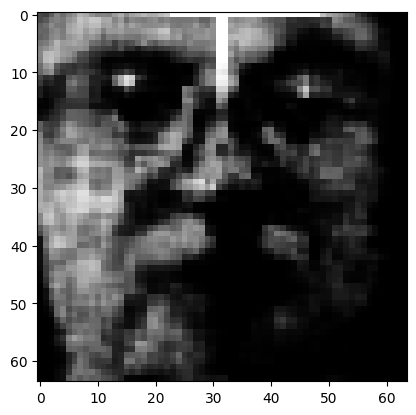

loss(generator):  966.0684789276123
loss(generator):  965.8518078613281
loss(generator):  965.6993675994873
loss(generator):  965.578596572876
loss(generator):  965.5582427215576
loss(generator):  965.5113206481933
loss(generator):  965.3194178009034
loss(generator):  965.2485563659668
loss(generator):  964.8158229064942
loss(generator):  964.90337890625
loss(generator):  964.8870656585693
loss(generator):  964.6813245391845
loss(generator):  964.6242744445801
loss(generator):  964.4994266510009
loss(generator):  964.4091482543945
loss(generator):  964.1043832397461
loss(generator):  964.181798400879
loss(generator):  963.8817167663574
loss(generator):  963.8641622161865
loss(generator):  963.4613027191162


In [21]:
train_VAE(100, 0.0000018, 0.00001, 0.997)

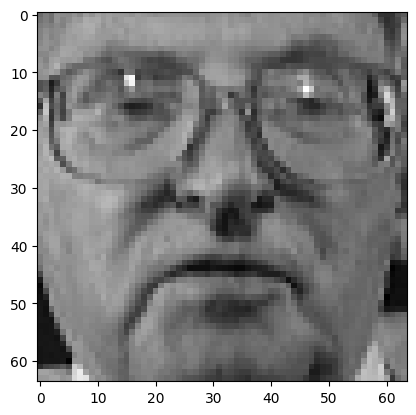

In [23]:
tensor_to_picture(train_data[200].detach().cpu().numpy()[0][0])

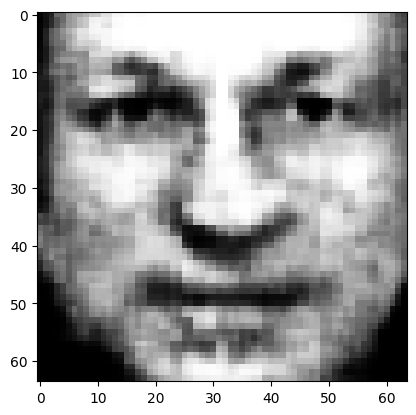

In [24]:
tensor_to_picture(decoder(encoder(train_data[199])).detach().cpu().numpy()[0][0])

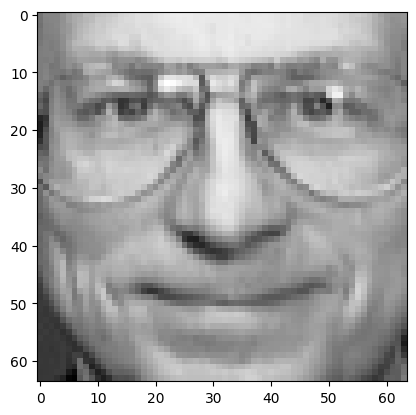

In [26]:
tensor_to_picture(train_data[199].detach().cpu().numpy()[0][0])

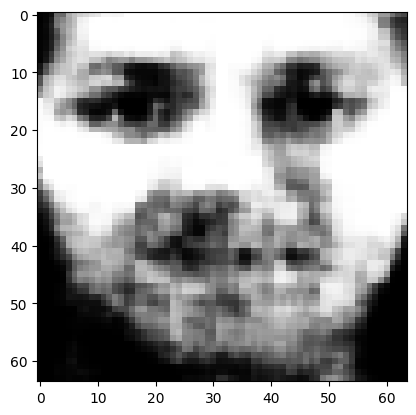

In [28]:
tensor_to_picture(decoder(encoder(train_data[198])).detach().cpu().numpy()[0][0])

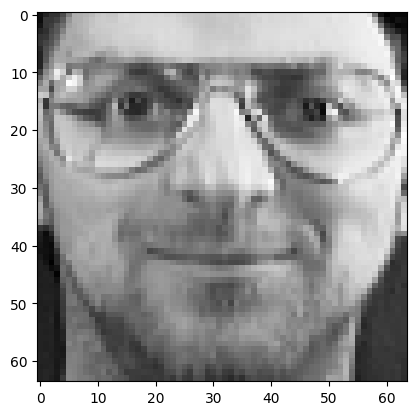

In [30]:
tensor_to_picture(train_data[198].detach().cpu().numpy()[0][0])

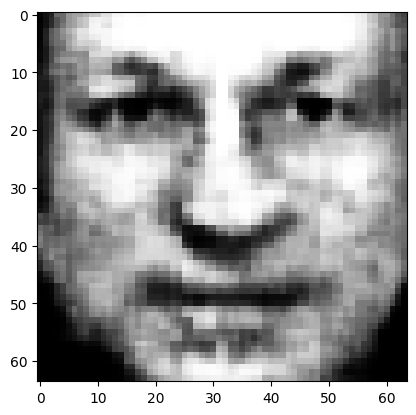

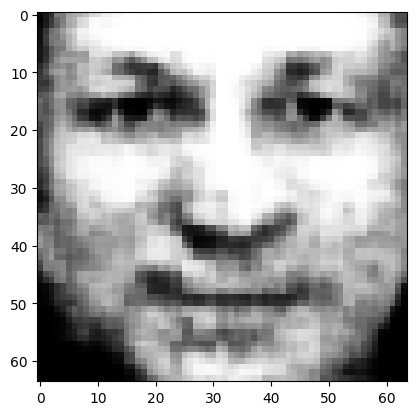

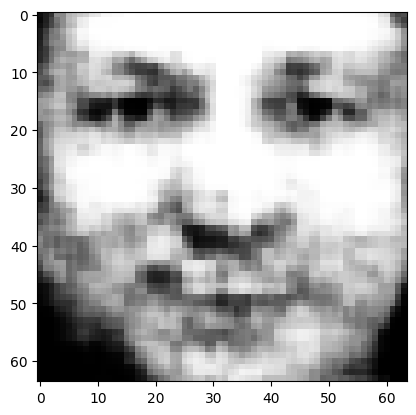

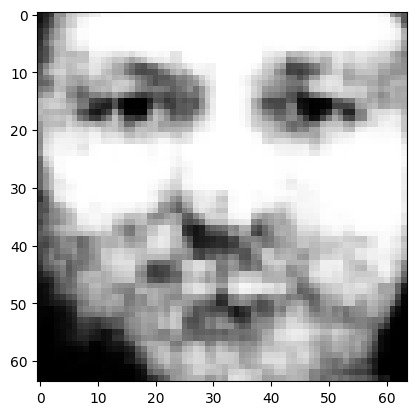

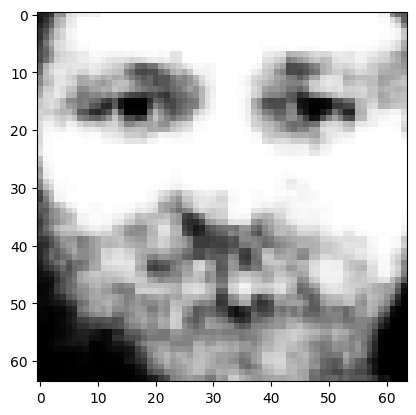

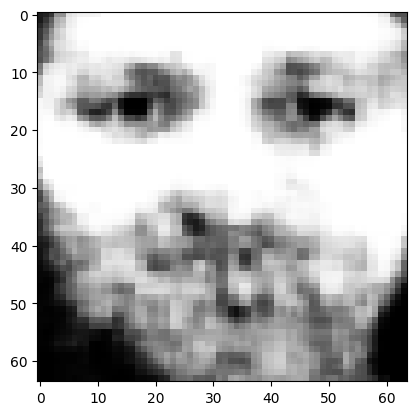

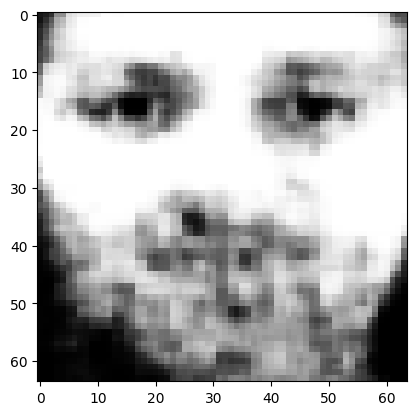

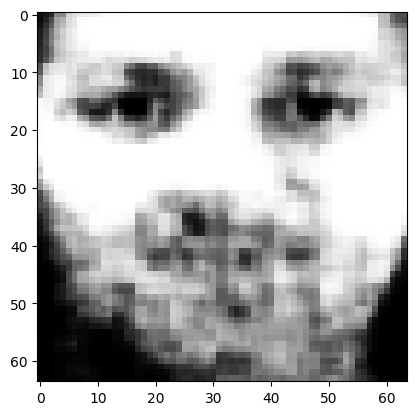

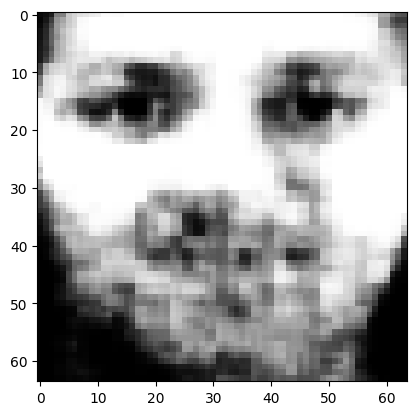

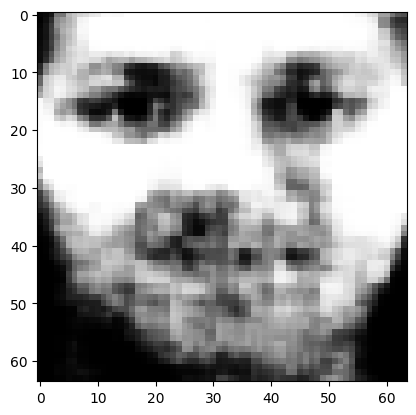

In [32]:
for i in range(10):
    dual = decoder(0.1*i*encoder(train_data[198])+0.1*(10-i)*encoder(train_data[199])).detach().cpu().numpy()[0][0]
    tensor_to_picture(dual)

In [36]:
cpu = torch.device('cpu')
encoder = encoder.to(cpu)
decoder = decoder.to(cpu)
torch.save(encoder.state_dict(), 'train_VAE_encoder.pt')
torch.save(decoder.state_dict(), 'train_VAE_decoder.pt')